In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [4]:
df.head(4)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5


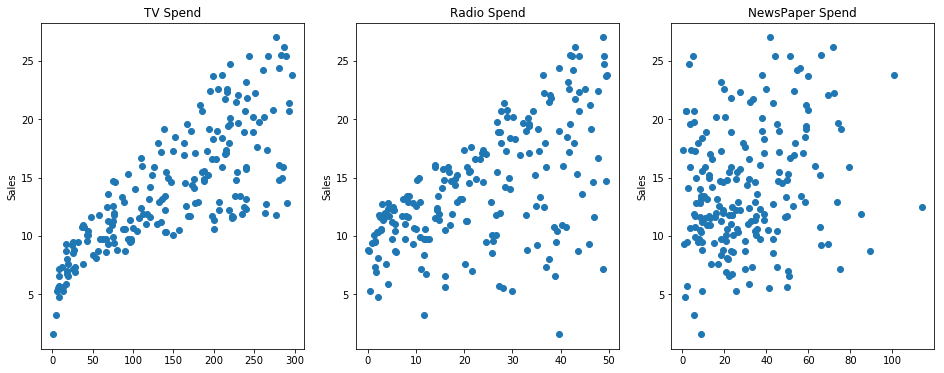

In [5]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('NewsPaper Spend')

plt.tight_layout;

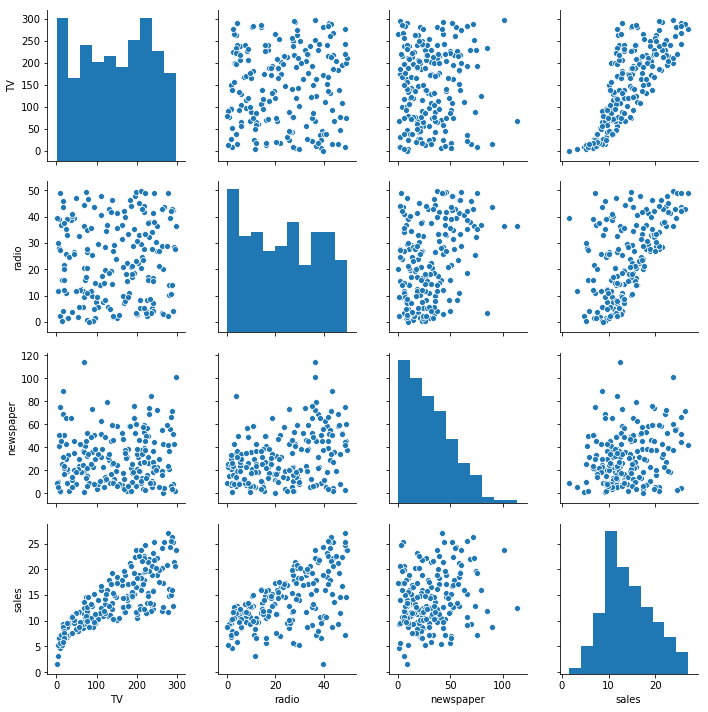

In [6]:
sns.pairplot(df)

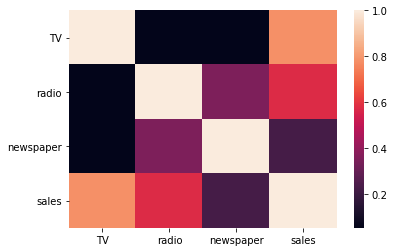

In [7]:
sns.heatmap(df.corr())

In [8]:
X = df.drop('sales',axis=1)
y = df['sales']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [10]:
lm = LinearRegression()

In [11]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
predictions = lm.predict(X_test)

In [13]:
predictions

array([ 15.74131332,  19.61062568,  11.44888935,  17.00819787,
         9.17285676,   7.01248287,  20.28992463,  17.29953992,
         9.77584467,  19.22194224,  12.40503154,  13.89234998,
        13.72541098,  21.28794031,  18.42456638,   9.98198406,
        15.55228966,   7.68913693,   7.55614992,  20.40311209,
         7.79215204,  18.24214098,  24.68631904,  22.82199068,
         7.97962085,  12.65207264,  21.46925937,   8.05228573,
        12.42315981,  12.50719678,  10.77757812,  19.24460093,
        10.070269  ,   6.70779999,  17.31492147,   7.76764327,
         9.25393336,   8.27834697,  10.58105585,  10.63591128,
        13.01002595,   9.77192057,  10.21469861,   8.04572042,
        11.5671075 ,  10.08368001,   8.99806574,  16.25388914,
        13.23942315,  20.81493419,  12.49727439,  13.96615898,
        17.56285075,  11.14537013,  12.56261468,   5.50870279,
        23.29465134,  12.62409688,  18.77399978,  15.18785675])

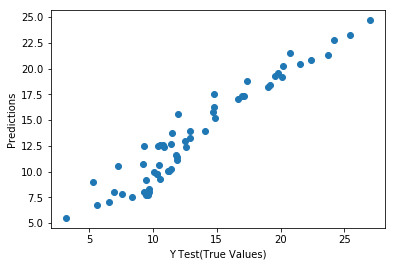

In [14]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predictions')
plt.show()

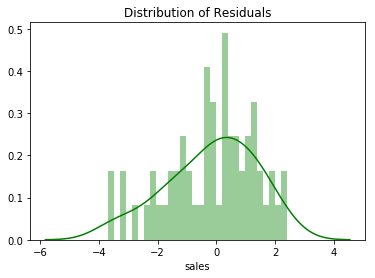

In [15]:
sns.distplot((y_test-predictions),color='green',bins=30)
plt.title('Distribution of Residuals')

In [16]:
from sklearn import metrics

In [17]:
print('MAE =', metrics.mean_absolute_error(y_test,predictions))
print('MSE =', metrics.mean_squared_error(y_test,predictions))
print('RMSE =',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE = 1.21374577361
MSE = 2.29871669789
RMSE = 1.5161519376


In [18]:
from sklearn.metrics import r2_score
# Calculate the R² score

metrics.explained_variance_score(y_test,predictions)

0.91976448269648314

In [19]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
TV,0.044696
radio,0.187566
newspaper,-0.000323


In [20]:
y_hat = lm.predict(X)

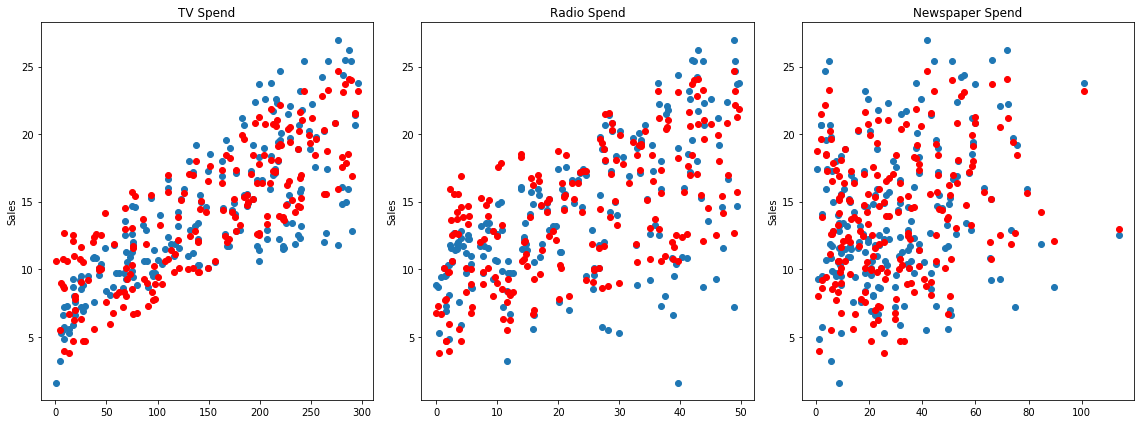

In [21]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

plt.tight_layout();

In [22]:
#TV = 149, Radio = 22, Newspaper = 12
#Sales?

campaign = [[149,22,12]]

In [23]:
lm.predict(campaign)

array([ 13.93380216])